In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [12]:
df = pd.read_csv("Dataset1.csv")

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df.shape

(768, 9)

In [15]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

print(X[:3, :])
print('-'*15)
print(y[:3])

[[72 35]
 [66 29]
 [64  0]]
---------------
[0 0 0]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train[:3])
print('-'*15)
print(y_train[:3])
print('-'*15)
print(X_test[:3])
print('-'*15)
print(y_test[:3])

[[62  0]
 [58 36]
 [80  0]]
---------------
[ 0 94  0]
---------------
[[76 43]
 [74 30]
 [62  0]]
---------------
[  0 100   0]


In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[-0.40451932 -1.31921491]
 [-0.61509602  0.9287299 ]
 [ 0.54307587 -1.31921491]]
---------------
[[ 0.33249916  1.36583027]
 [ 0.2272108   0.55407243]
 [-0.40451932 -1.31921491]]


In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(X_test[:10])
print('-'*15)
print(y_pred[:10])

[[ 0.33249916  1.36583027]
 [ 0.2272108   0.55407243]
 [-0.40451932 -1.31921491]
 [ 0.12192245 -0.13279959]
 [-0.24658679 -1.31921491]
 [ 0.12192245 -0.19524251]
 [ 0.43778751  0.80384407]
 [ 0.85894093  0.3667437 ]
 [-0.61509602  0.17941496]
 [ 0.12192245  0.67895825]]
---------------
[0 0 0 0 0 0 0 0 0 0]


In [25]:
X_train

array([[-0.40451932, -1.31921491],
       [-0.61509602,  0.9287299 ],
       [ 0.54307587, -1.31921491],
       ...,
       [-0.24658679,  0.05452914],
       [ 0.2272108 , -1.31921491],
       [ 0.64836422, -1.31921491]])

In [26]:
X_test

array([[ 0.33249916,  1.36583027],
       [ 0.2272108 ,  0.55407243],
       [-0.40451932, -1.31921491],
       [ 0.12192245, -0.13279959],
       [-0.24658679, -1.31921491],
       [ 0.12192245, -0.19524251],
       [ 0.43778751,  0.80384407],
       [ 0.85894093,  0.3667437 ],
       [-0.61509602,  0.17941496],
       [ 0.12192245,  0.67895825],
       [ 0.33249916,  0.9287299 ],
       [ 0.33249916,  0.3667437 ],
       [ 0.2272108 , -1.31921491],
       [-0.93096108,  0.05452914],
       [ 0.12192245,  0.11697205],
       [-0.08865426, -0.07035668],
       [ 0.12192245,  1.30338736],
       [-1.03624944, -0.69478579],
       [ 0.85894093,  0.61651534],
       [-0.82567273,  0.42918661],
       [ 0.64836422,  0.67895825],
       [ 0.54307587, -1.31921491],
       [-3.66845828,  0.11697205],
       [ 0.64836422,  0.42918661],
       [-0.19394261, -0.38257124],
       [-0.50980767,  0.67895825],
       [ 0.33249916, -1.31921491],
       [ 0.96422928,  0.99117281],
       [-0.19394261,

In [27]:
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0 100   0 175   0  40 171 156 275 190 245 207   0 115   0   0 130   0
   0  83]


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]


In [29]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
import seaborn as sns

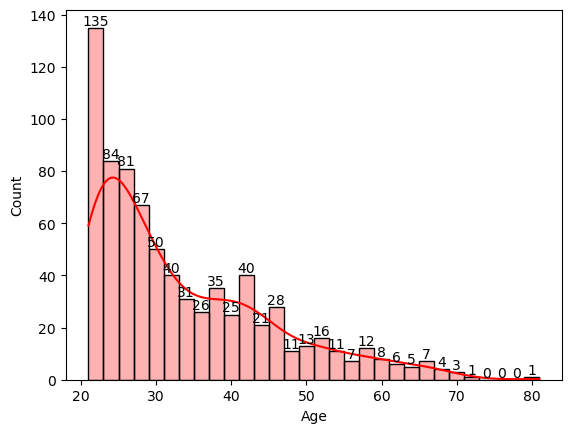

In [67]:
histplot = sns.histplot(df['Age'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()
import warnings
warnings.filterwarnings("ignore")

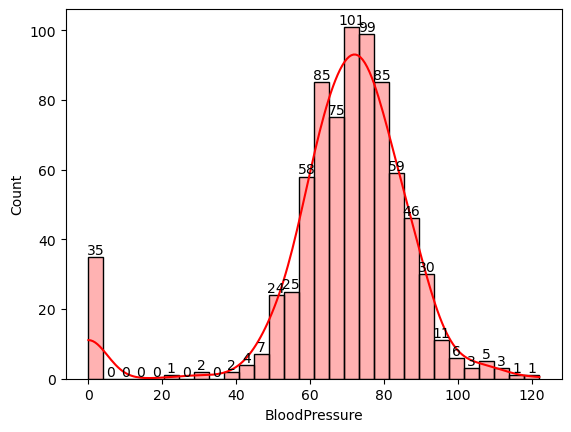

In [68]:
histplot = sns.histplot(df['BloodPressure'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

In [33]:
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

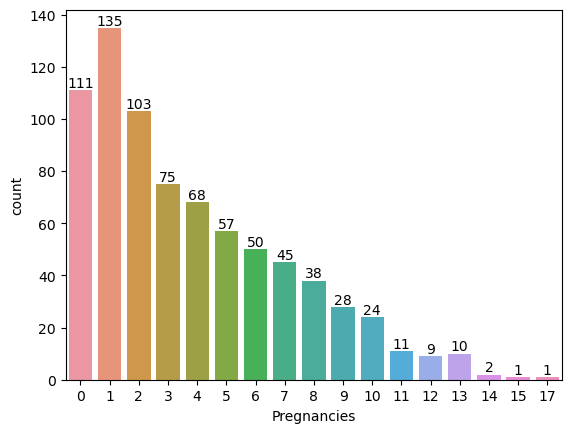

In [47]:
countplot = sns.countplot(x=df["Pregnancies"])
for container in countplot.containers:
    countplot.bar_label(container)
    plt.show()

In [48]:
model = LogisticRegression(n_jobs=-1)

In [49]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [50]:
y_pred = model.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]


In [52]:
TP = cm[1, 1]

In [53]:
FP = cm[0, 1]

In [54]:
TN = cm[0, 0]

In [55]:
FN = cm[1, 0]

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy)


Accuracy:  0.5416666666666666


In [58]:
error_rate = 1 - accuracy
print("\nError Rate: ", error_rate)


Error Rate:  0.45833333333333337


In [69]:
precision = precision_score(y_test, y_pred, average='weighted')
print("\nPrecision (weighted): ", precision)


Precision (weighted):  0.29340277777777773


In [60]:
recall = recall_score(y_test, y_pred, average='weighted')
print("\nRecall (weighted): ", recall)


Recall (weighted):  0.5416666666666666


In [61]:
print(f"\nTP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")


TP: 0, FP: 0, TN: 104, FN: 1


Name: Lad Nitesh

Roll No.: 13224